In [1]:
# get the latest version from pypi 
# for other installations approaches, see https://dynamo-release.readthedocs.io/en/latest/ten_minutes_to_dynamo.html#how-to-install
# !pip install dynamo-release --upgrade --quiet

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import dynamo as dyn
dyn.get_all_dependencies_version()

/usr/local/lib/python3.6/dist-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


package colorcet loompy    tqdm dynamo-release pynndescent cvxopt      trimap  \
version    2.0.2  3.0.6  4.42.1         0.95.2       0.5.0  1.2.5  1.4.3.dev1   

package numdifftools umap-learn hdbscan anndata matplotlib   numba pandas  \
version       0.9.39      0.4.6  0.8.26   0.7.5      3.3.2  0.51.2  1.1.4   

package python-igraph scikit-learn  scipy seaborn statsmodels   numpy  \
version         0.8.3       0.23.2  1.5.2  0.11.0      0.11.1  1.16.0   

package setuptools  
version     50.3.0

In [3]:
# emulate ggplot2 plotting styple with white background

dyn.configuration.set_figure_params('dynamo', background='white')  

In [4]:
adata = dyn.sample_data.chromaffin()


/home/xqiu/.local/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


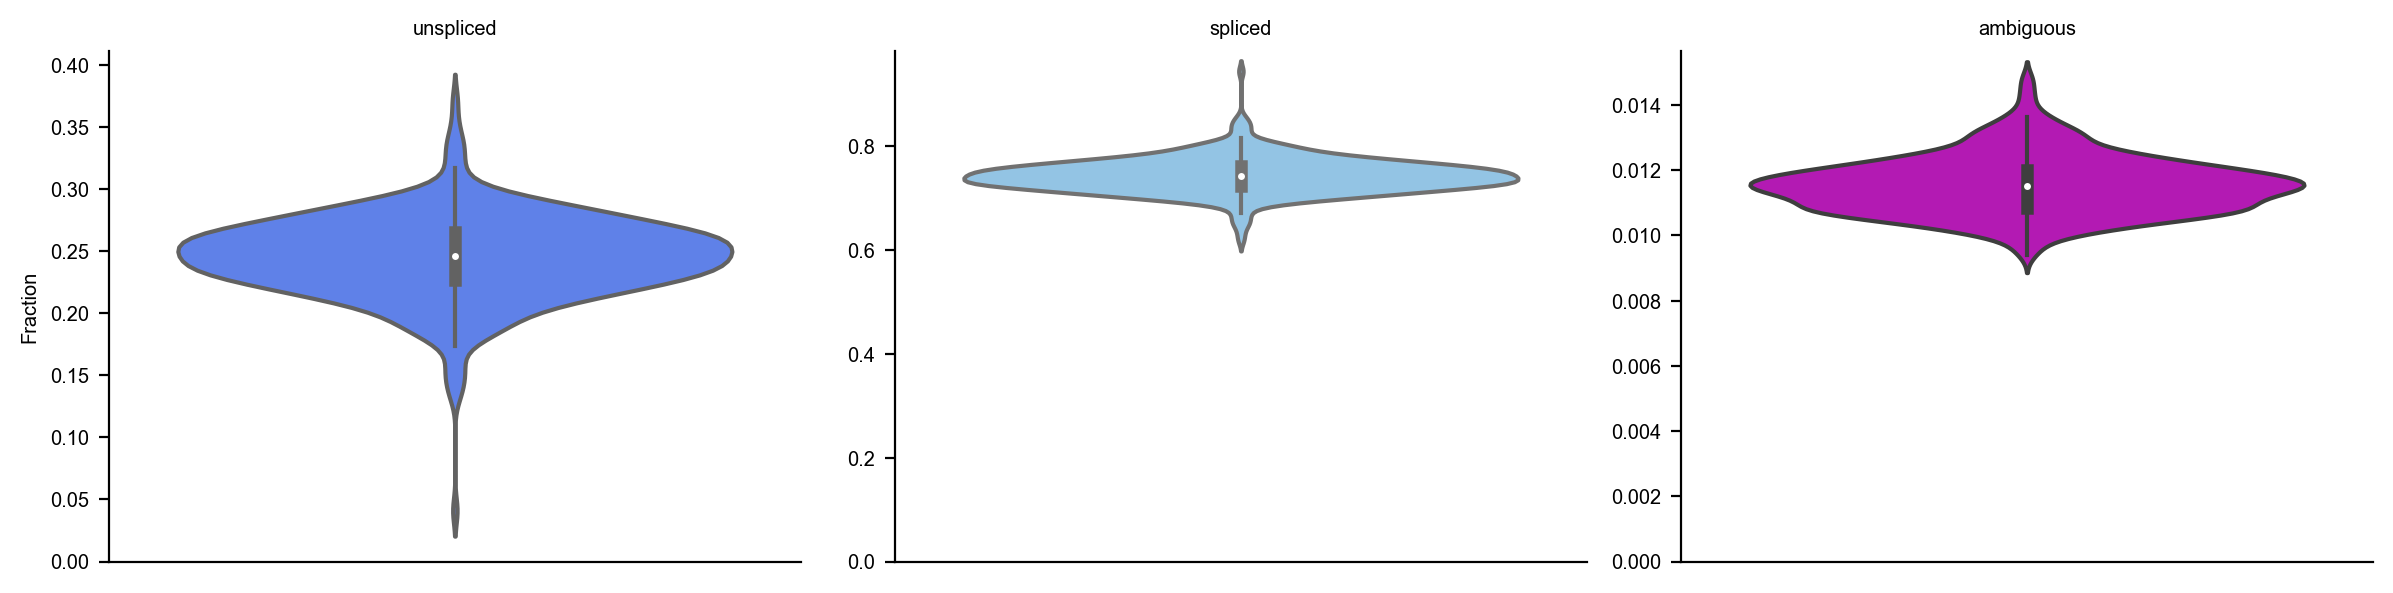

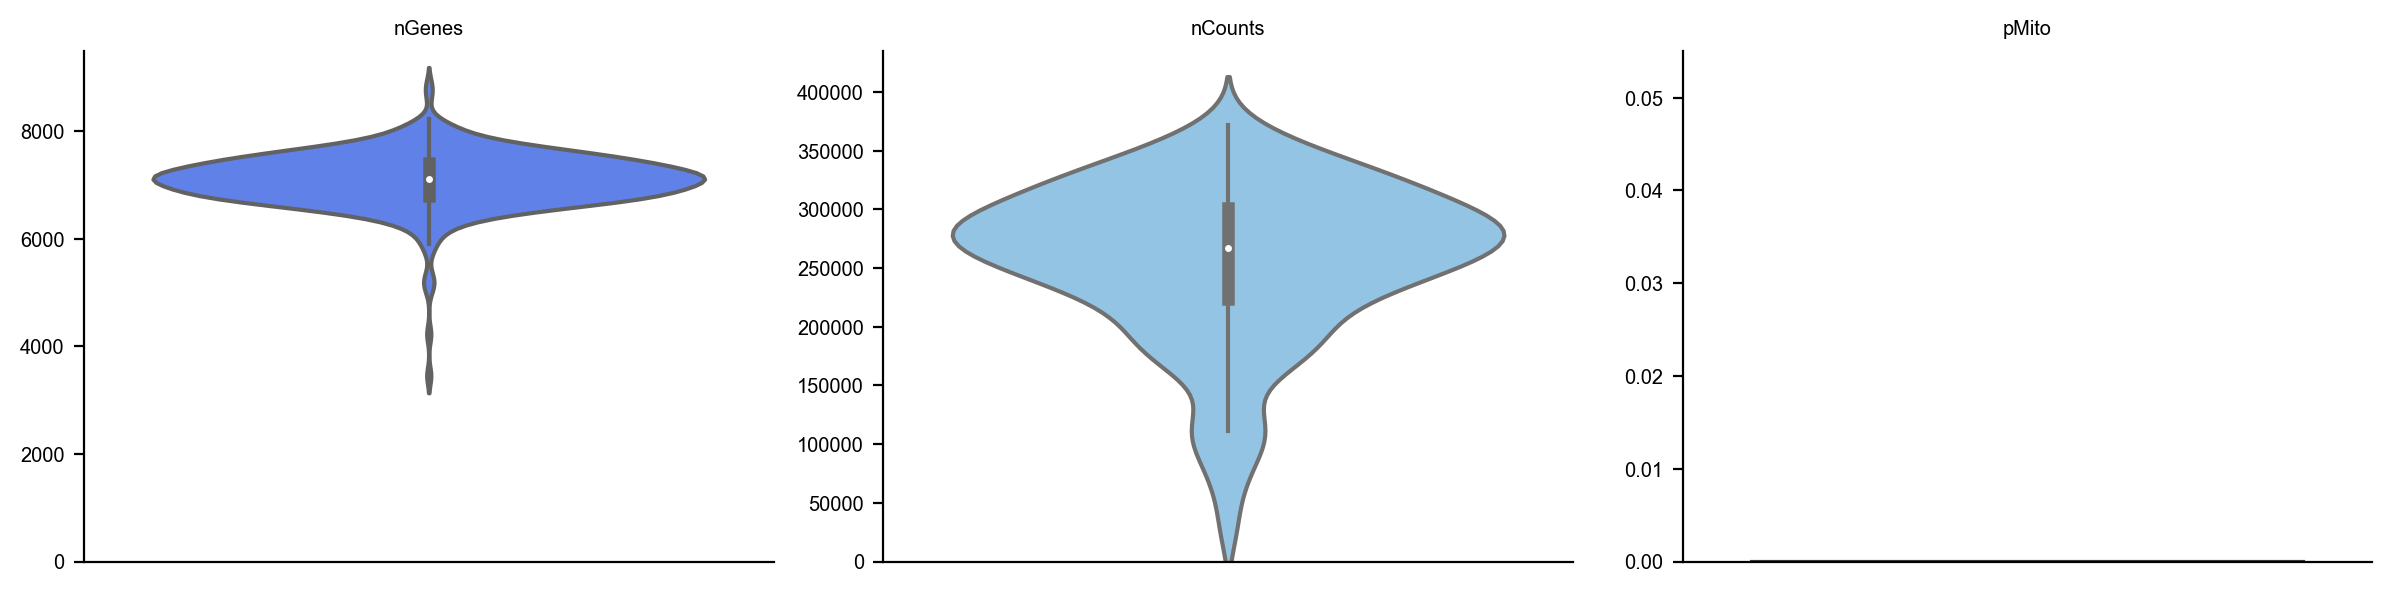

In [5]:
dyn.pl.show_fraction(adata)
dyn.pl.basic_stats(adata)


In [6]:
dyn.pp.recipe_monocle(adata, n_top_genes=1000)


/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/preprocessing/utils.py:439: UserWarning: `total_szfactor` is not `None` and it is not in adata object.
  warnings.warn("`total_szfactor` is not `None` and it is not in adata object.")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/preprocessing/cell_cycle.py:70: RuntimeWarning: invalid value encountered in greater_equal
  return gene_list[corrs >= threshold]


AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection'
    obsm: 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced'

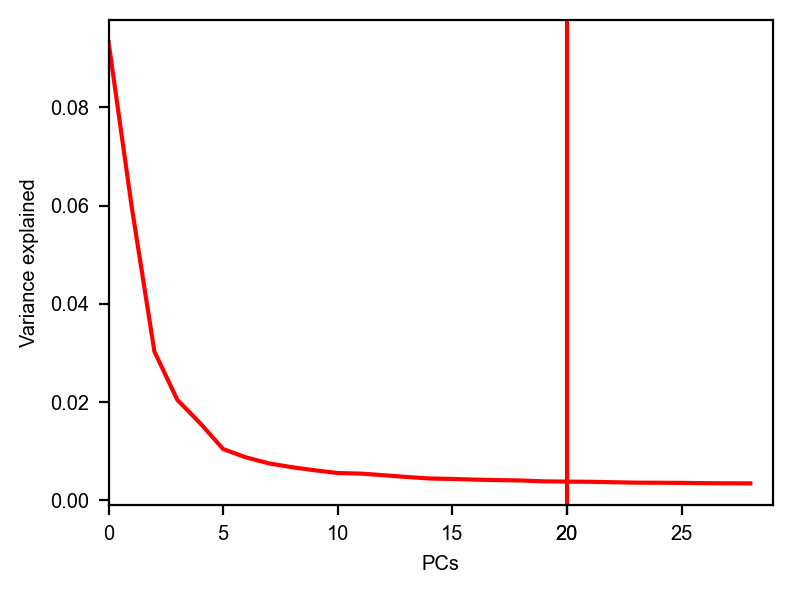

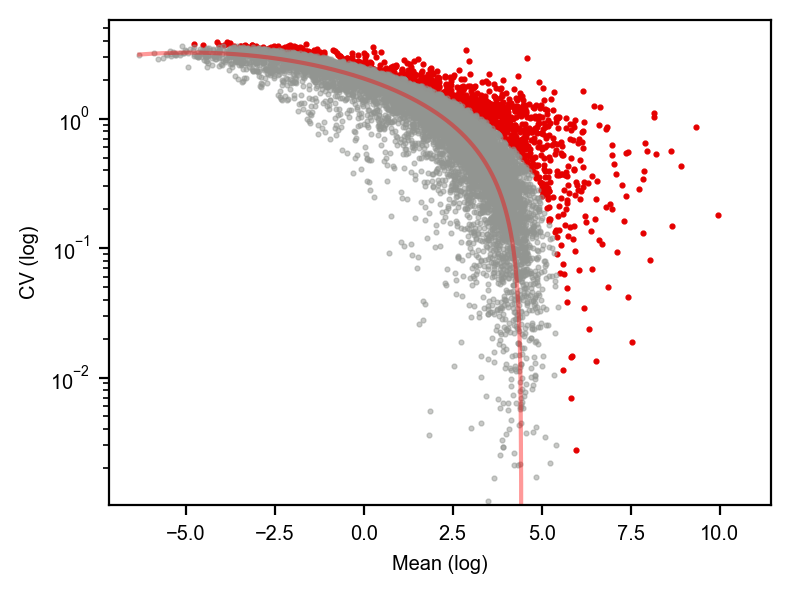

In [7]:
dyn.pl.variance_explained(adata)
dyn.pl.feature_genes(adata)

In [8]:
dyn.tl.dynamics(adata, model='stochastic') 
# or dyn.tl.dynamics(adata, model='deterministic')
# or dyn.tl.dynamics(adata, model='stochastic', est_method='negbin')

estimating gamma: 100%|██████████| 1000/1000 [00:05<00:00, 175.50it/s]


AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con'

In [9]:
dyn.tl.reduceDimension(adata)


AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit'
    obsm: 'X_pca', 'X', 'cell_cycle_scores', 'X_umap'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'moments_con', 'connectivities', 'distanc

In [10]:
dyn.tl.cell_velocities(adata)


calculating transition matrix via pearson kernel with sqrt transform.: 100%|██████████| 384/384 [00:00<00:00, 522.92it/s]
projecting velocity vector to low dimensional embedding...: 100%|██████████| 384/384 [00:00<00:00, 2837.02it/s]


AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 'X', 'cell_cycle_scores', 'X_umap', 'velocity_umap'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 've

In [11]:
gene_list = adata.var.index[adata.var.use_for_transition][:3]

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:194: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("glasbey_white"))
  cmap.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying t

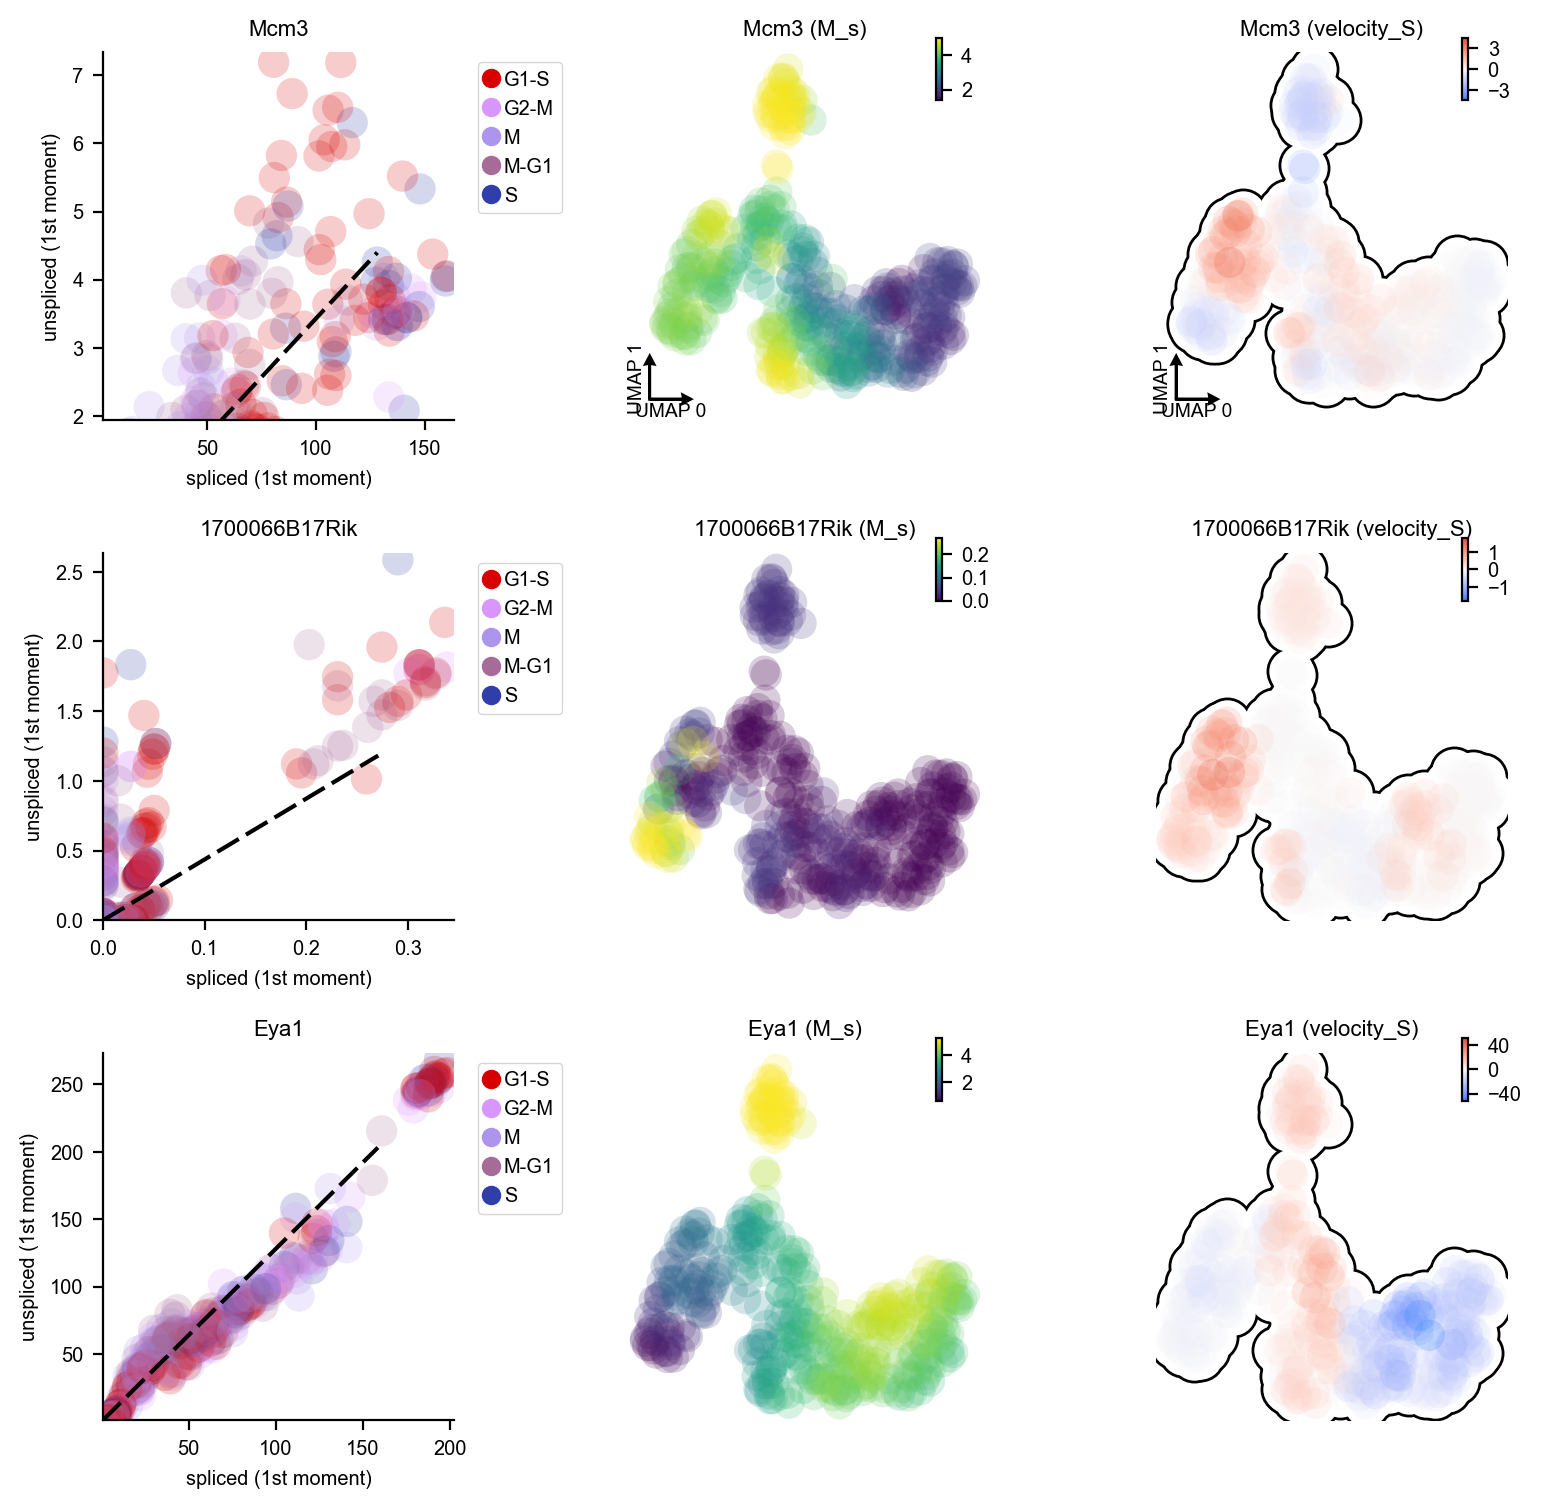

In [12]:
dyn.pl.phase_portraits(adata, genes=gene_list, ncols=3, figsize=(3, 3), basis='umap', show_quiver=False)

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/scVectorField.py:513: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

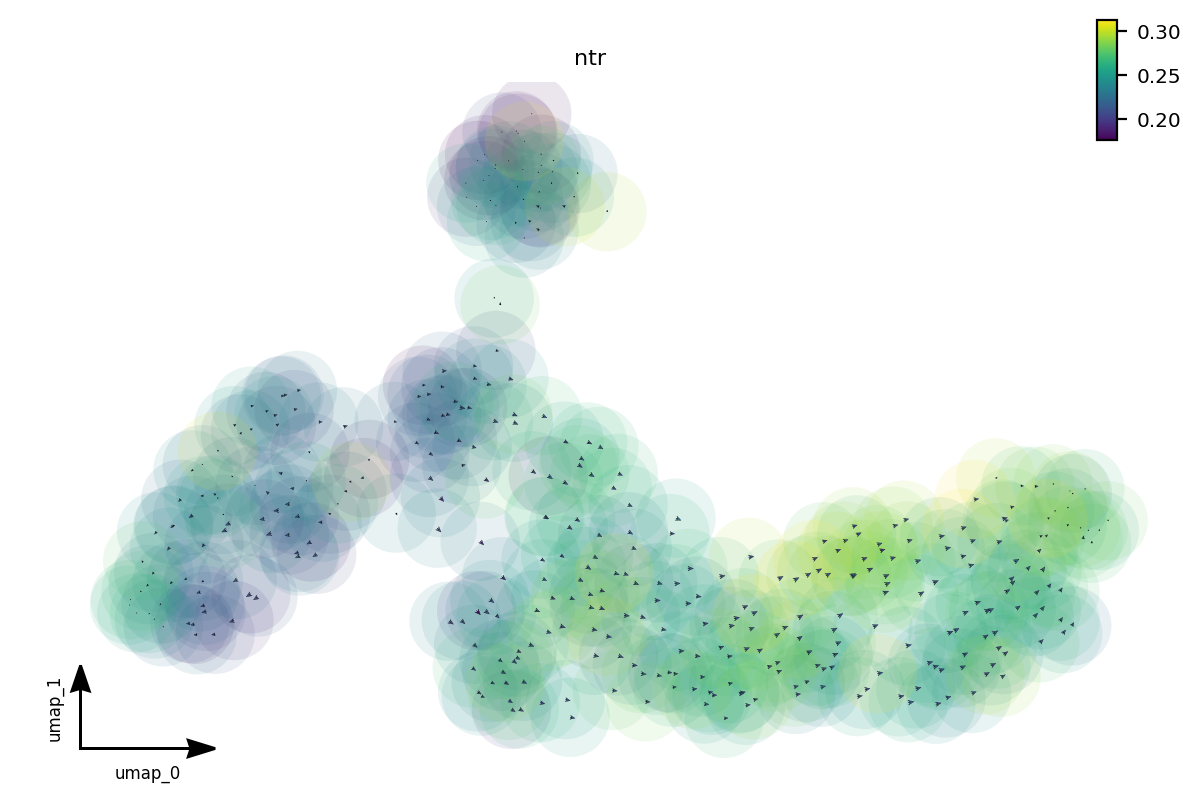

In [13]:
dyn.pl.cell_wise_vectors(adata, basis='umap', quiver_size=2, quiver_length=1, show_legend='on data') # ['GRIA3', 'LINC00982', 'AFF2']



/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/scVectorField.py:784: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

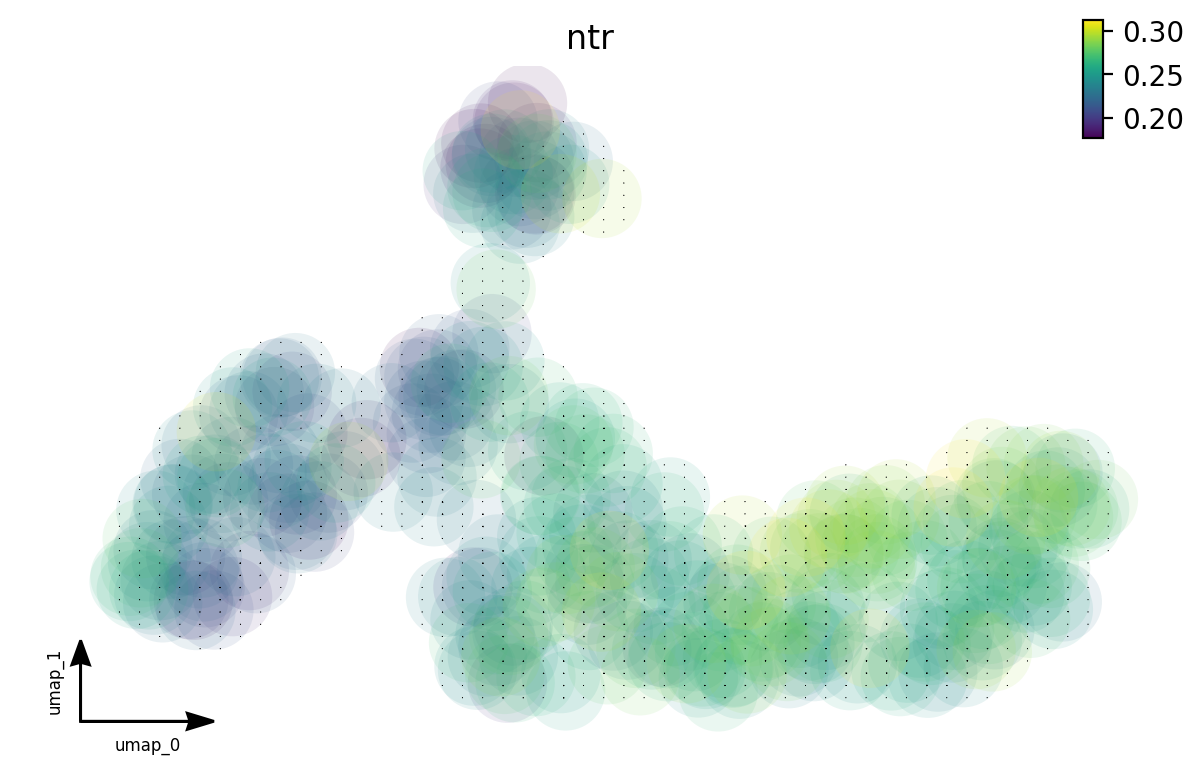

In [14]:
dyn.pl.grid_vectors(adata,  basis='umap', method='gaussian')

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/scVectorField.py:1060: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

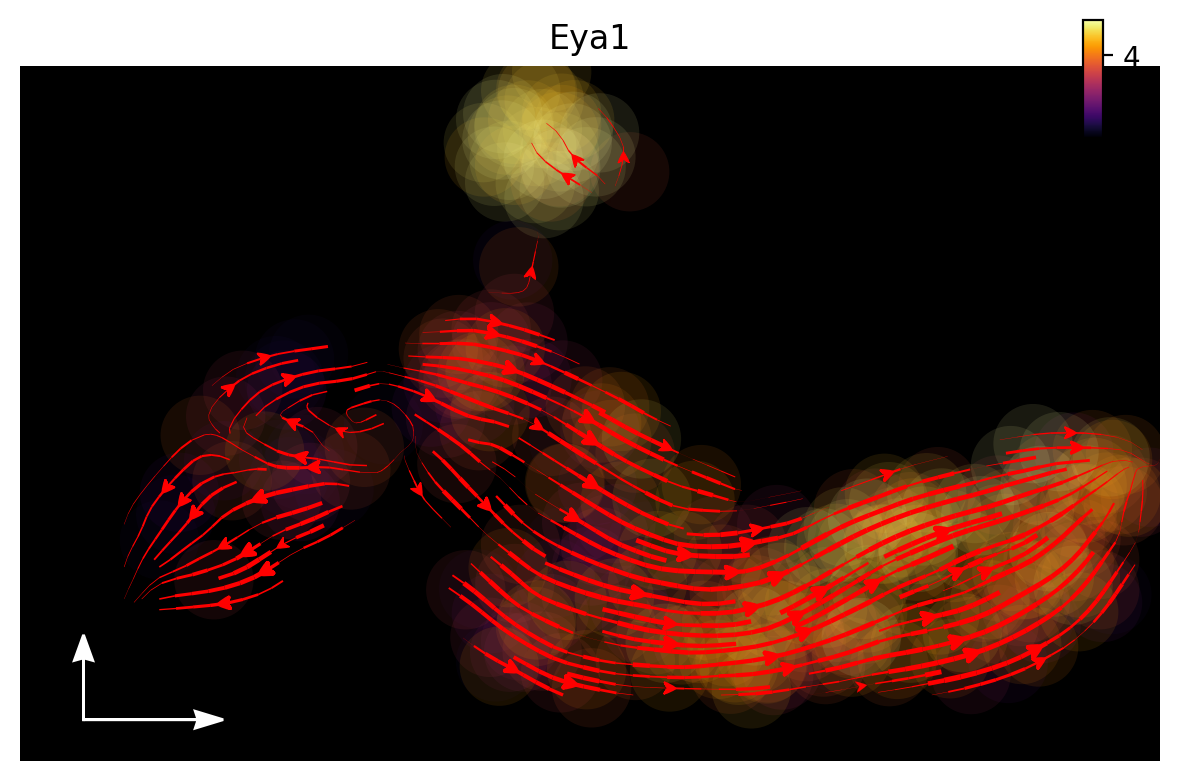

In [15]:
dyn.pl.streamline_plot(adata, color=adata.var.index[adata.var.use_for_transition][:1], basis='umap', background='black') 


/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/scVectorField.py:1060: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

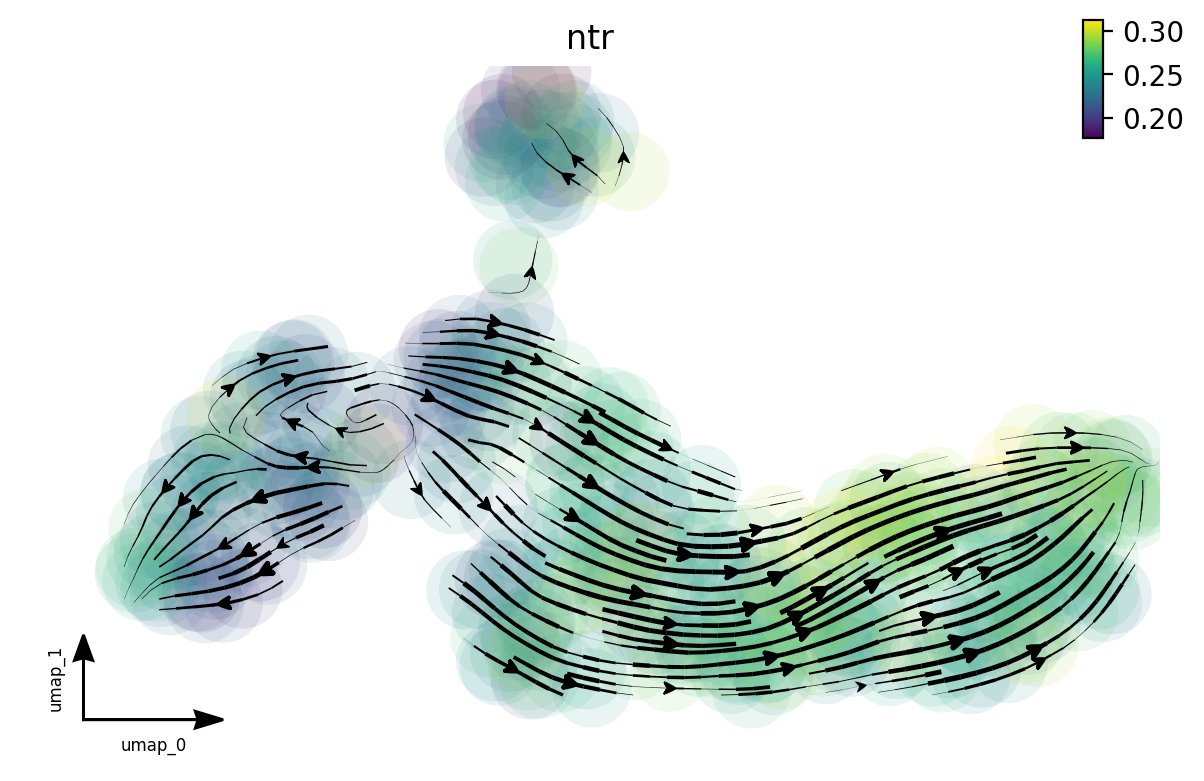

In [16]:
dyn.pl.streamline_plot(adata, basis='umap') 

In [17]:
dyn.vf.VectorField(adata, basis='umap', dims=[0, 1])


/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/vectorfield/topography.py:718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[control_point][vf_dict['VecFld']['ctrl_idx']] = True
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/vectorfield/topography.py:719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[inlier_prob][valid_ids] = vf_dict['VecFld']['P'].flatten()


AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap', 'VecFld_umap', 'VecFld'
    obsm: 'X_pca', 'X', 'cell_cycle_scores', 'X_umap', 'velocity_umap', 'velocity_umap_SparseVFC', 'X_umap_SparseVFC'
    l

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you inte

<Figure size 600x400 with 0 Axes>

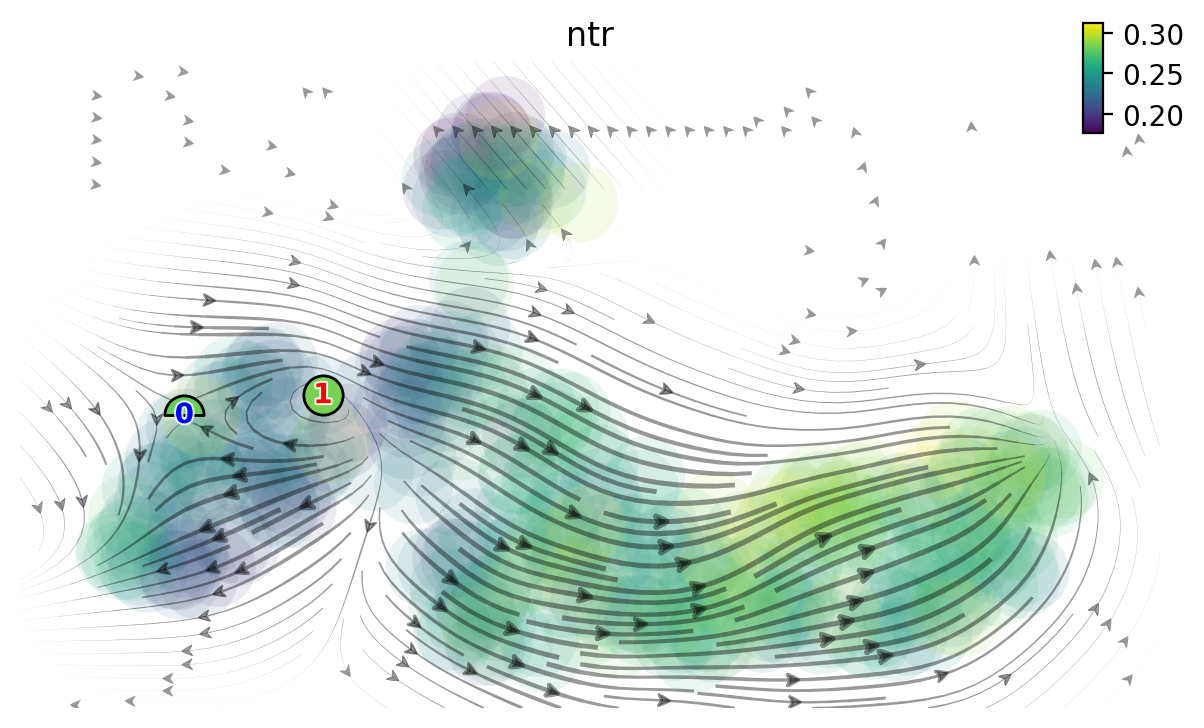

In [18]:
dyn.pl.topography(adata,  basis='umap', ncols=2)

In [19]:
dyn.configuration.set_figure_params('dynamo', background='black')  

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:194: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("glasbey_dark"))
  cmap.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying th

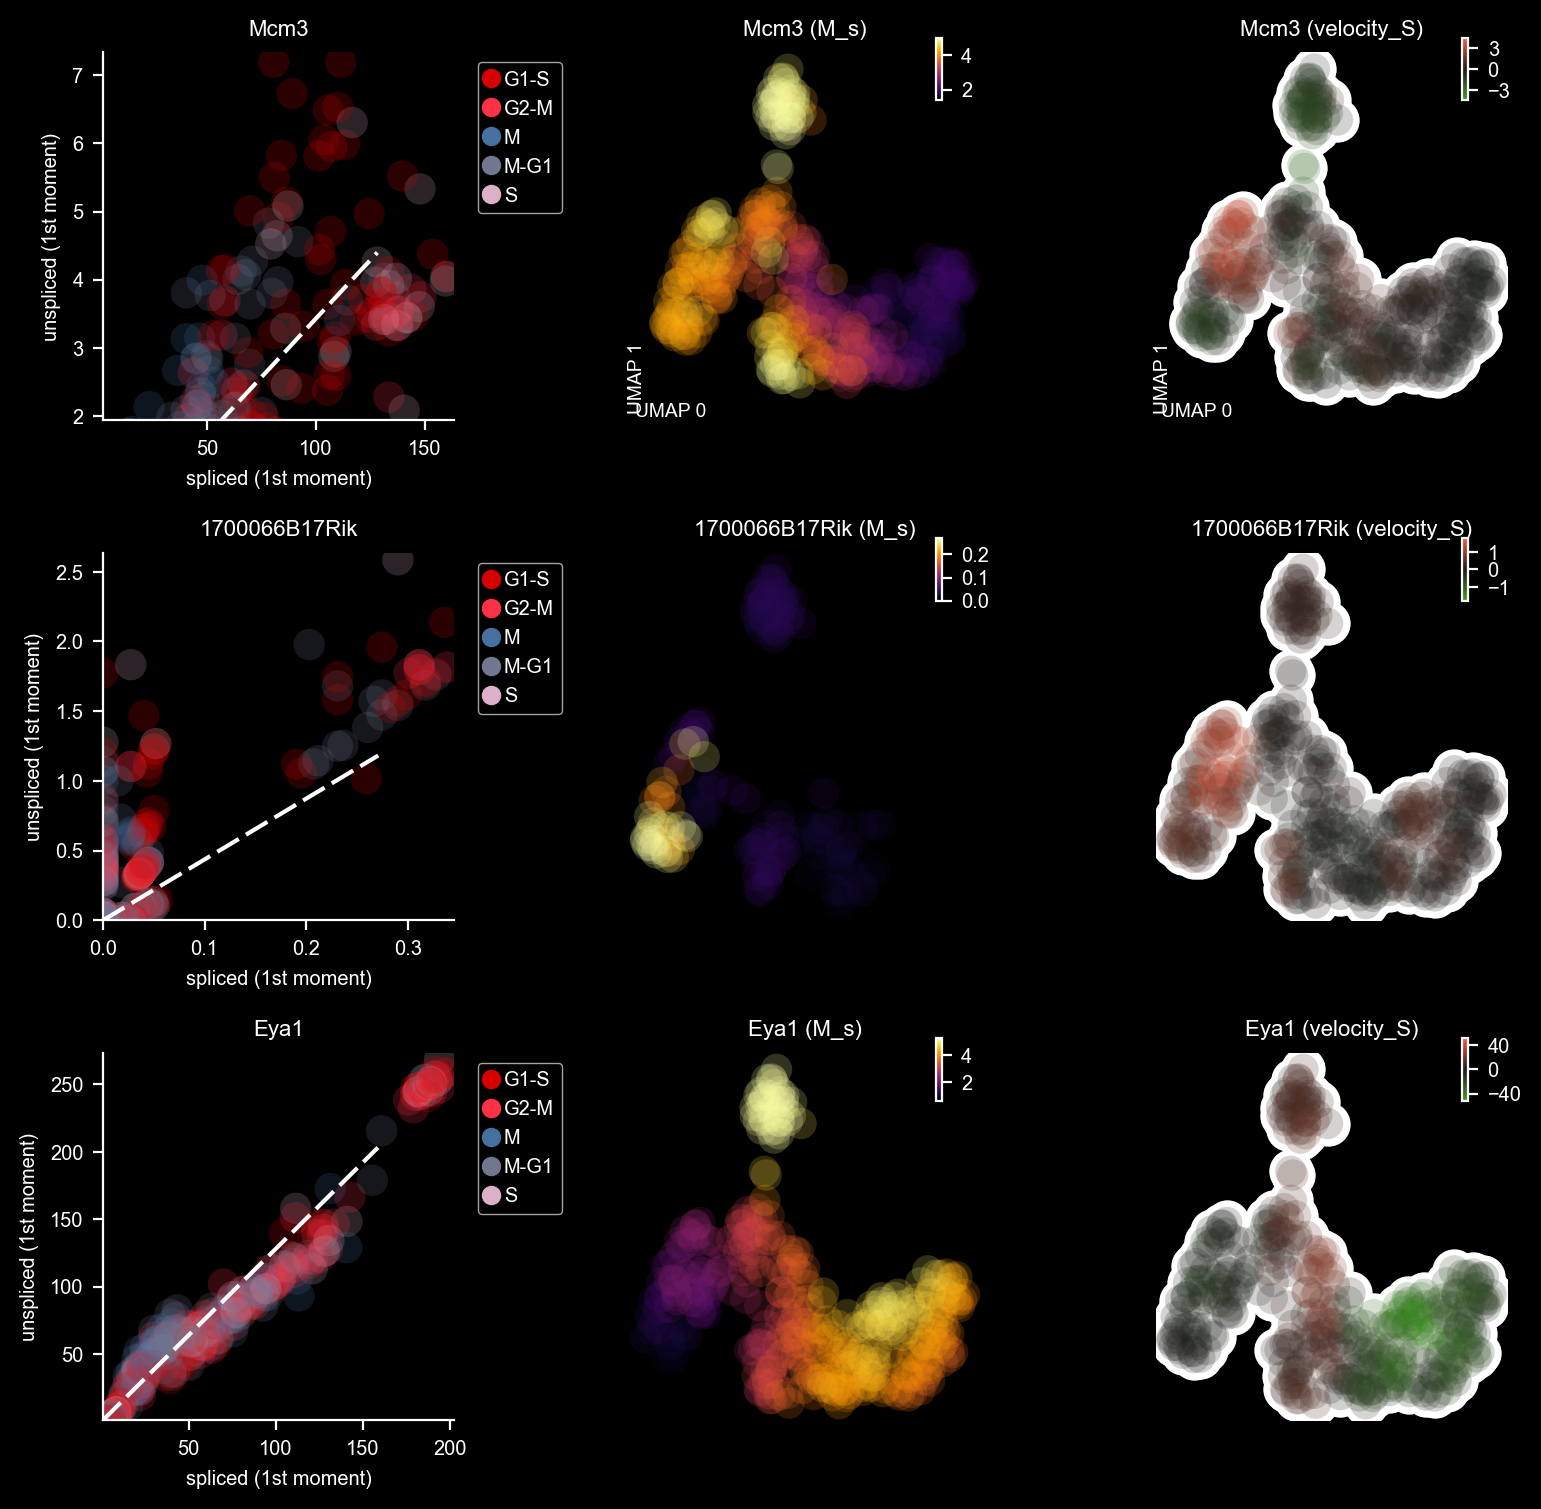

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/scVectorField.py:513: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

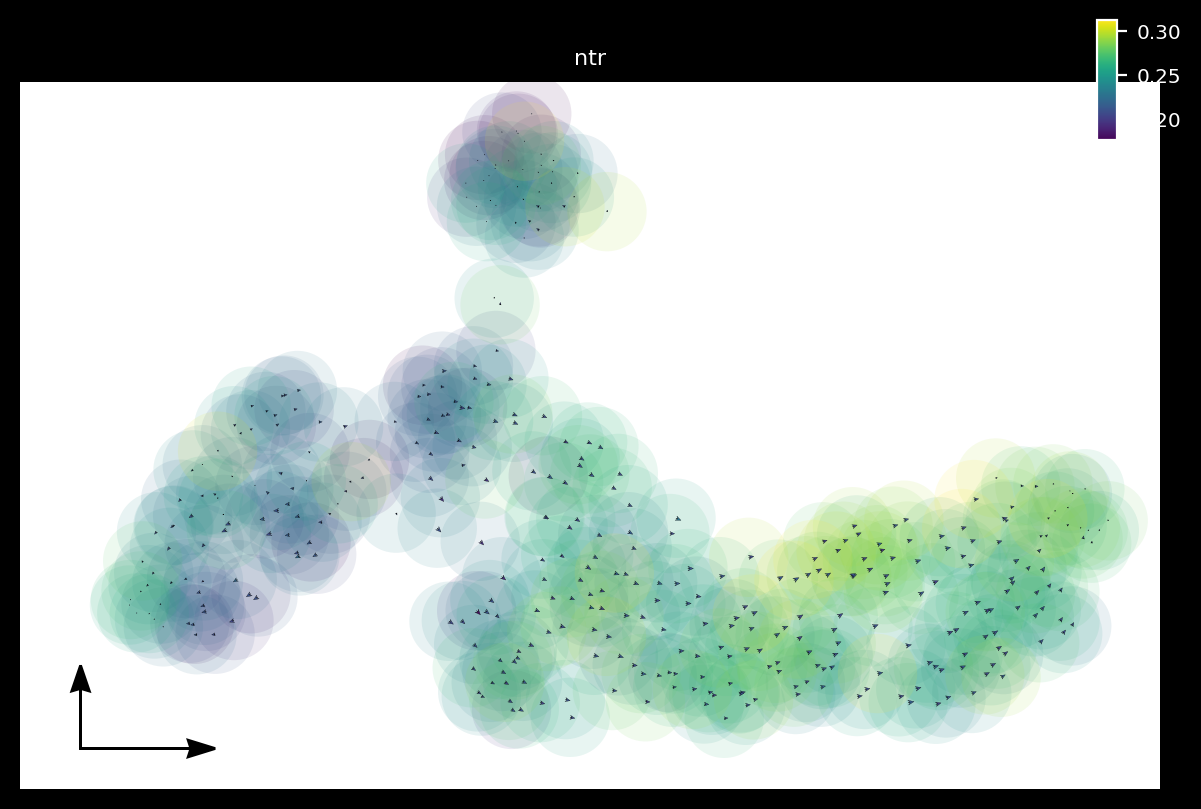

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/scVectorField.py:784: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

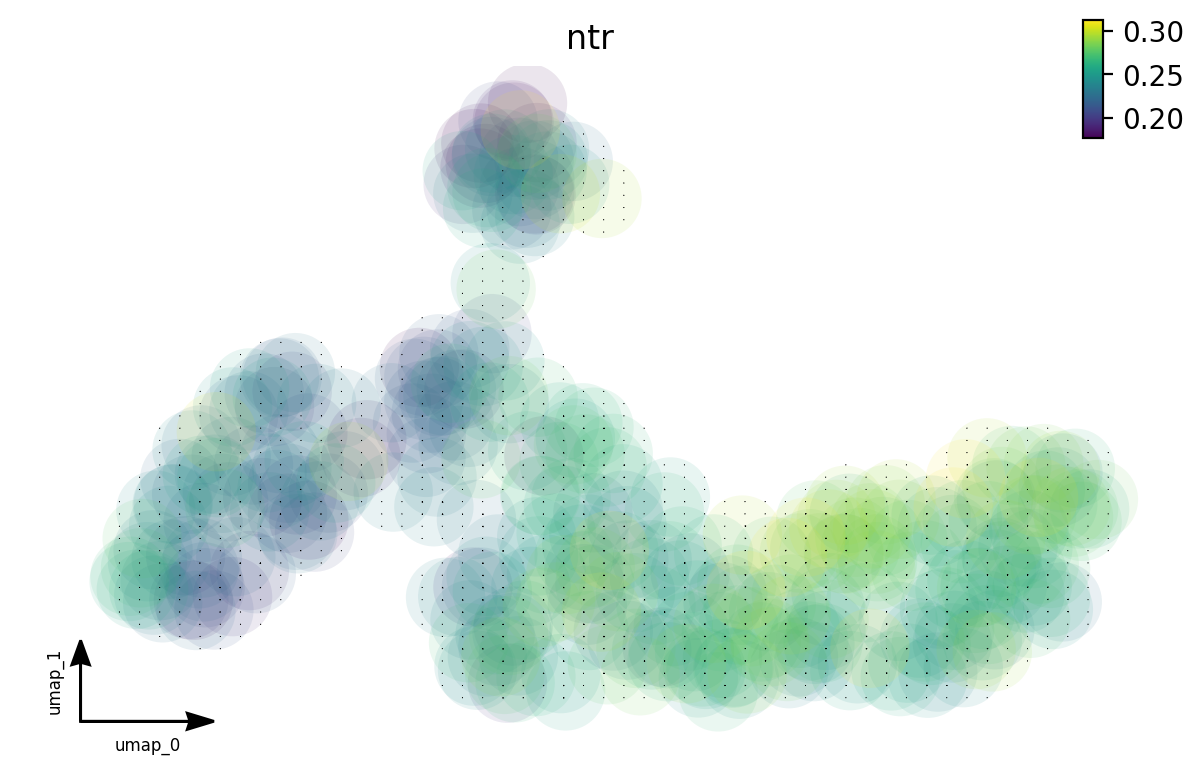

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/scVectorField.py:1060: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

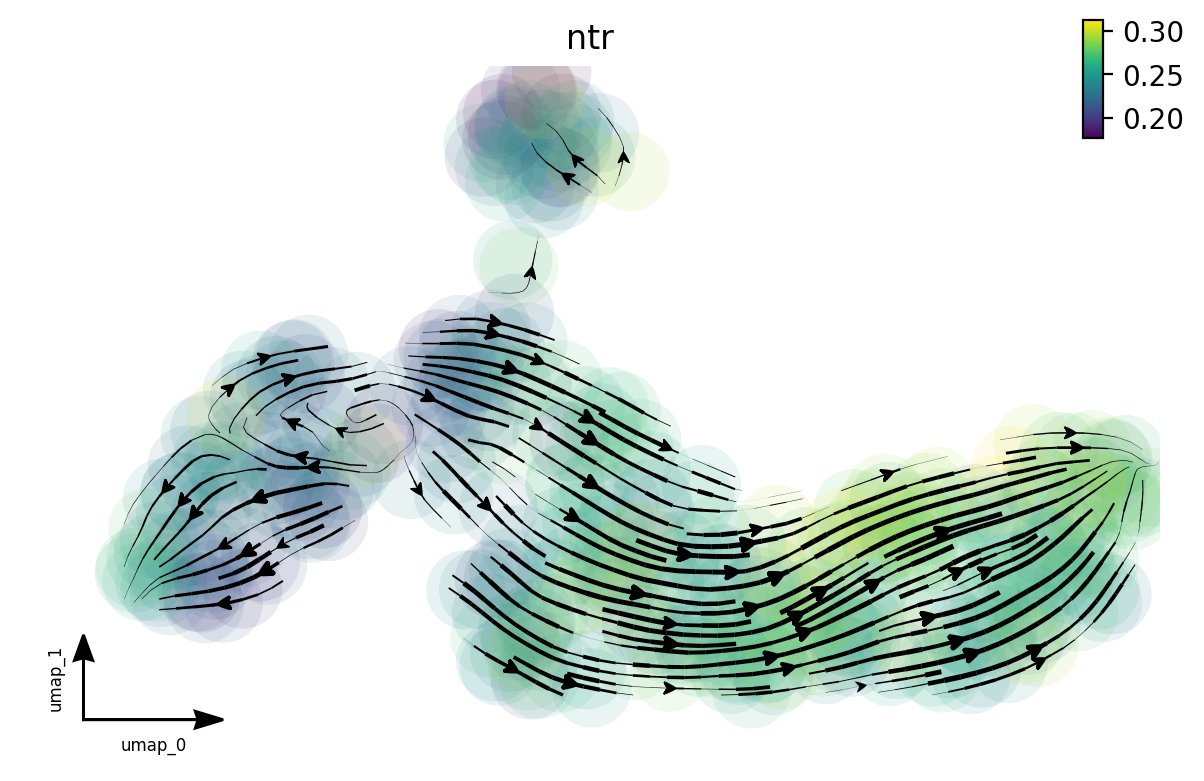

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you inte

<Figure size 600x400 with 0 Axes>

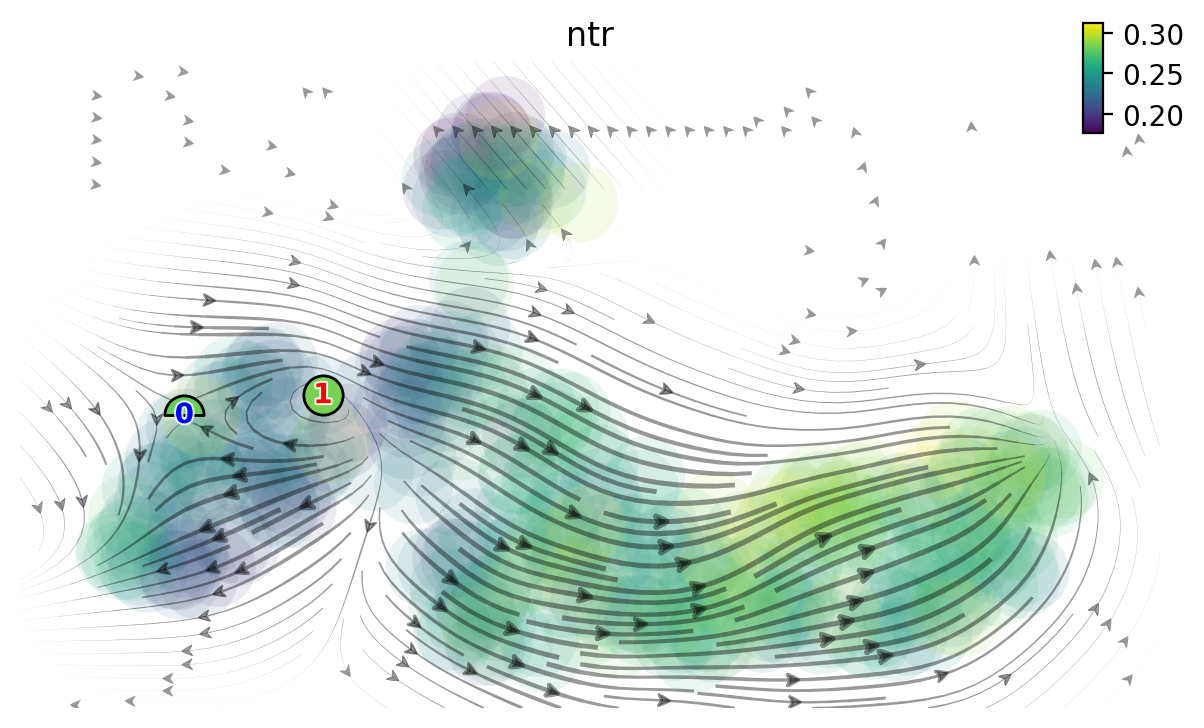

In [20]:
dyn.pl.phase_portraits(adata, genes=gene_list, ncols=3, figsize=(3, 3), basis='umap', show_quiver=False)

dyn.pl.cell_wise_vectors(adata, basis='umap', quiver_size=2, quiver_length=1) # ['GRIA3', 'LINC00982', 'AFF2']

dyn.pl.grid_vectors(adata,  basis='umap', method='gaussian')

dyn.pl.streamline_plot(adata, basis='umap') 

dyn.pl.topography(adata, basis='umap', ncols=2)



In [21]:
dyn.pl.streamline_plot(adata, color=['Chga'], basis='umap', show_legend='on data',  background='white',
                        show_arrowed_spines=False, save_show_or_return='save',
                        pointsize=0.4, ncols=1, alpha = 0.7, 
                       save_kwargs={'prefix': 'chromaffin_streamline', 'ext': 'png',
                                     "bbox_inches": None}, 
                        figsize=(3, 3))

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")


Saving figure to /lab/solexa_weissman/xqiu/proj/Aristotle/dynamo-tutorials/chromaffin_streamline_dyn_savefig.png...
Done


<Figure size 300x300 with 0 Axes>

In [22]:
dyn.pl.phase_portraits(adata, genes=['Chga'], basis='umap',
                       show_quiver=True,
                       background='white',
                        show_arrowed_spines=False, save_show_or_return='save',
                        pointsize=0.4, alpha = 0.7, quiver_length=10, quiver_size=6, 
                       save_kwargs={'prefix': 'chromaffin_phase_portrait', 'ext': 'png',
                                     "bbox_inches": None}, 
                        figsize=(6, 4))

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:194: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("glasbey_white"))
  cmap.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying t

Saving figure to /lab/solexa_weissman/xqiu/proj/Aristotle/dynamo-tutorials/chromaffin_phase_portrait_dyn_savefig.png...
Done


In [23]:
dyn.pl.phase_portraits(adata, genes=['Chga'], basis='umap',
                       show_quiver=True,
                       background='white',
                        show_arrowed_spines=False, save_show_or_return='save',
                        pointsize=0.4, alpha = 0.7, quiver_length=10, quiver_size=6, 
                       save_kwargs={'prefix': 'chromaffin_phase_portrait', 'ext': 'pdf',
                                     "bbox_inches": None}, 
                        figsize=(6, 4))

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:194: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("glasbey_white"))
  cmap.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying t

Saving figure to /lab/solexa_weissman/xqiu/proj/Aristotle/dynamo-tutorials/chromaffin_phase_portrait_dyn_savefig.pdf...
Done


In [24]:
dyn.pl.topography(adata, color=['Chga'], basis='umap', show_legend='on data',  background='white',
                        show_arrowed_spines=False, save_show_or_return='save',
                        pointsize=0.4, ncols=1, alpha = 0.7, 
                       save_kwargs={'prefix': 'chromaffin_topography', 'ext': 'png',
                                     "bbox_inches": None}, 
                        figsize=(3, 3))

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you inte

Saving figure to /lab/solexa_weissman/xqiu/proj/Aristotle/dynamo-tutorials/chromaffin_topography_dyn_savefig.png...
Done


<Figure size 300x300 with 0 Axes>

In [25]:
dyn.tl.cell_velocities(adata, basis='pca')
dyn.vf.VectorField(adata, basis='pca', pot_curl_div=True)


projecting velocity vector to low dimensional embedding...: 100%|██████████| 384/384 [00:00<00:00, 3401.38it/s]

Using existing pearson_transition_matrix found in .obsp.



Constructing diffusion graph from reconstructed vector field: 384it [00:11, 33.04it/s]
Calculating divergence: 100%|██████████| 384/384 [00:00<00:00, 3274.32it/s]
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/vectorfield/topography.py:718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[control_point][vf_dict['VecFld']['ctrl_idx']] = True
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/vectorfield/topography.py:719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[inlier_prob][valid_ids] = vf_dict['VecFld']['P'].flatten()


AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'divergence_pca', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap', 'VecFld_umap', 'VecFld', 

In [26]:
adata

AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'divergence_pca', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap', 'VecFld_umap', 'VecFld', 

In [27]:
dyn.tl.cell_velocities(adata, basis='pca')
dyn.vf.VectorField(adata, basis='pca')
dyn.vf.speed(adata, basis='pca')
dyn.vf.divergence(adata, basis='pca')
dyn.vf.acceleration(adata, basis='pca')
dyn.vf.curl(adata)

projecting velocity vector to low dimensional embedding...: 100%|██████████| 384/384 [00:00<00:00, 2902.54it/s]


Using existing pearson_transition_matrix found in .obsp.


/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/vectorfield/topography.py:718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[control_point][vf_dict['VecFld']['ctrl_idx']] = True
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/vectorfield/topography.py:719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[inlier_prob][valid_ids] = vf_dict['VecFld']['P'].flatten()
Calculating 2-D curl: 100%|██████████| 384/384 [00:00<00:00, 12712.72it/s]


In [28]:
adata

AnnData object with n_obs × n_vars = 384 × 23420
    obs: 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'divergence_pca', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'speed_pca', 'acceleration_pca', 'curl_umap'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'log_m', 'score', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', '

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("bwr"))
  cmap_.set_bad("lightgray")


<AxesSubplot:title={'center':'divergence_pca'}>

<Figure size 600x400 with 0 Axes>

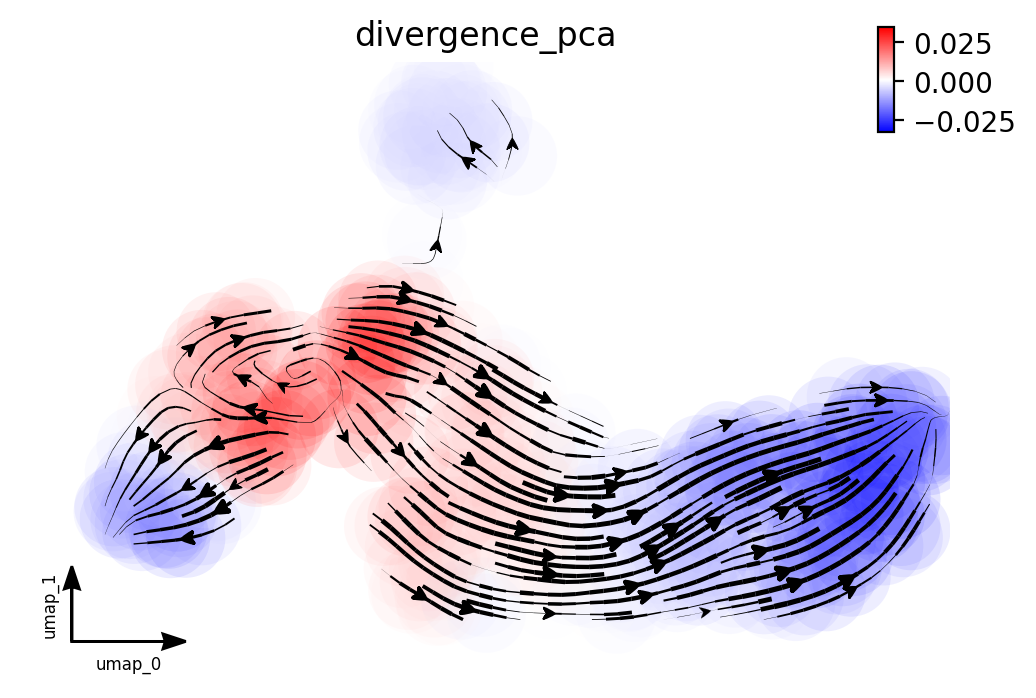

In [29]:
dyn.pl.streamline_plot(adata, color='divergence_pca', save_show_or_return='return', cmap='bwr', sym_c=True)

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")
/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the st

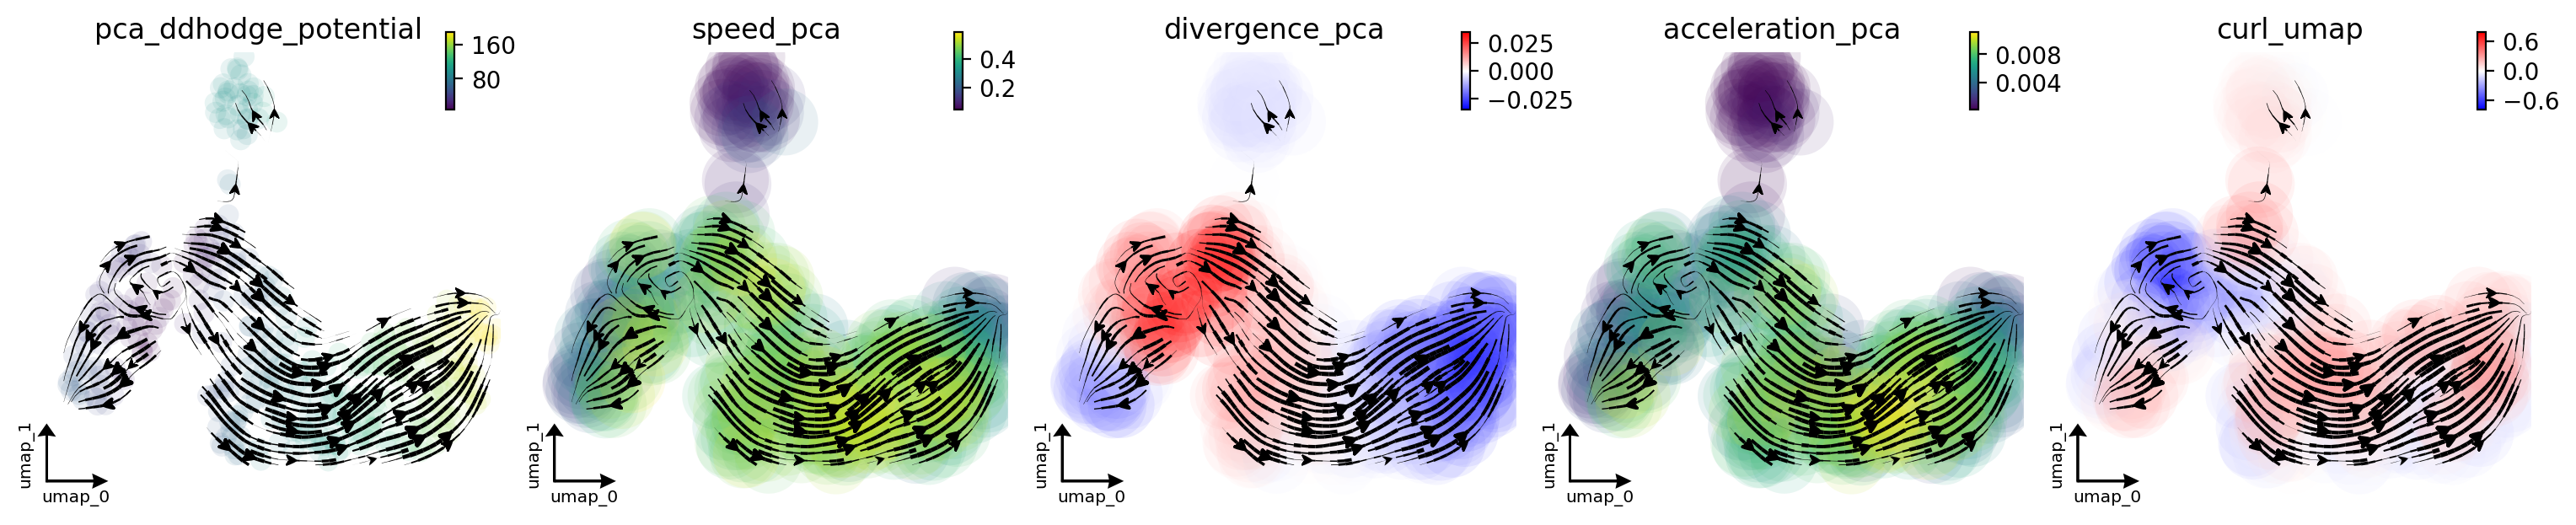

In [30]:
import matplotlib.pyplot as plt
fig1, f1_axes = plt.subplots(ncols=5, nrows=1, constrained_layout=True, figsize=(15, 3))
f1_axes
f1_axes[0] = dyn.pl.streamline_plot(adata, color='pca_ddhodge_potential', pointsize=0.1, alpha = 0.7, ax=f1_axes[0], quiver_length=6, quiver_size=6, save_show_or_return='return')
f1_axes[1] = dyn.pl.streamline_plot(adata, color='speed_pca', ax=f1_axes[1], quiver_length=12, quiver_size=12, save_show_or_return='return')
f1_axes[2] = dyn.pl.streamline_plot(adata, color='divergence_pca', ax=f1_axes[2], save_show_or_return='return', cmap='bwr', s_kwargs_dict= {"sym_c": True})
f1_axes[3] = dyn.pl.streamline_plot(adata, color='acceleration_pca', ax=f1_axes[3], save_show_or_return='return')
f1_axes[4] = dyn.pl.streamline_plot(adata, color='curl_umap', ax=f1_axes[4], save_show_or_return='return', cmap='bwr', s_kwargs_dict= {"sym_c": True})
plt.savefig(dpi=300, fname='./Chromaffin_vector_calculus.png')

/home/xqiu/.local/lib/python3.6/site-packages/dynamo_release-0.95.2-py3.6.egg/dynamo/plot/utils.py:304: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap_.set_bad("lightgray")


AttributeError: 'PathCollection' object has no property 'legend'

<Figure size 300x300 with 0 Axes>

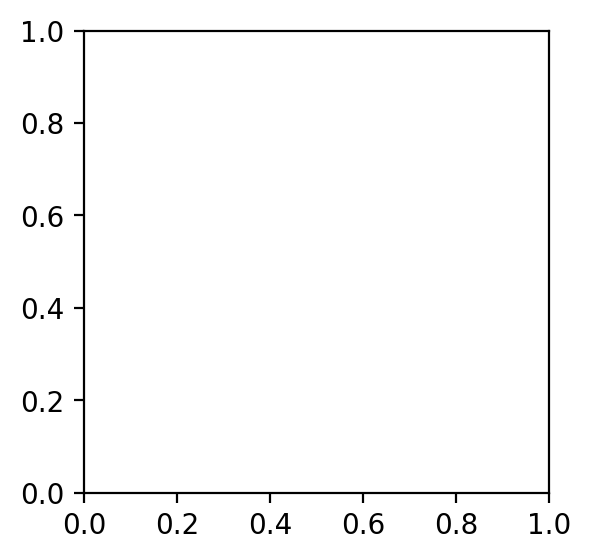

In [31]:
example_genes = ['Chga']
import numpy as np 

dyn.pl.scatters(adata, x=np.repeat('pca_ddhodge_potential', 1),
                     y=example_genes, layer='X_spliced', color='pca_ddhodge_potential', 
                     background='white', figsize=(3, 3), save_show_or_return='save',
                     pointsize=0.4, ncols=1, alpha = 0.7, legend=False,
                     save_kwargs={'prefix': 'Chromaffin_potential', 'ext': 'png', "bbox_inches": None})

In [ ]:
example_genes = ['Chga']
import numpy as np 

dyn.pl.scatters(adata, x=np.repeat('pca_ddhodge_potential', 1),
                     y=example_genes, layer='X_spliced', color='pca_ddhodge_potential', 
                     background='white', figsize=(3, 3), save_show_or_return='save',
                     pointsize=0.4, ncols=1, alpha = 0.7, 
                     save_kwargs={'prefix': 'Chromaffin_potential_no', 'ext': 'png', "bbox_inches": None})